## 1. Problem formulation

- ​**Risky Asset Return:**  
  $$
  Y_t = 
  \begin{cases} 
  a & \text{with probability } p \\
  b & \text{with probability } 1 - p 
  \end{cases},
  $$
  where $ a > r $ (up return) and $ b < r $ (down return).

- ​**Wealth Dynamics:**  
  $$
  W_{t+1} = x_t (Y_t - r) + W_t (1 + r)
  $$

- ​**Utility:** CARA utility at terminal time $ T = 10 $:  
  $$
  U(W_T) = \frac{1 - e^{-a W_T}}{a}
  $$

- ​**MDP Formulation:**  
  The problem satisfies the Markov property:

  The transition to $ W_{t+1} $ and the reward $ R_t $ depend solely on the current state $ W_t $ and action $ x_t $, not on earlier states or actions.  
  This is evident from the wealth dynamics equation $ W_{t+1} = x_t(Y_t - r) + W_t(1 + r) $, where $ Y_t $ is the only source of randomness, and its distribution is memoryless.

  1. ​**State Space**: $ S_t = \mathbb{R}^+ $ (continuous wealth $ W_t $).  
  2. ​**Action Space**: $ A_t = \mathbb{R} $ (unconstrained investment $ x_t $).  
  3. ​**Reward**: Rewards: Zero except at T, where reward is \frac{-e^{-a W_T}}{a}

  4. ​**Objective**: Maximize the expected terminal utility $ \mathbb{E}[U(W_T)] $.
  The objective simplifies to maximizing $\max_x \mathbb{E} \left[ \frac{-e^{-a W_T}}{a} \right]$

## 2. Dynamic Programming Derivation

### Value Function Form

Assume the optimal value function at time $ t $ has the exponential form:  
$$
V_t^*(W_t) = -b_t e^{-c_t W_t},
$$  
where $ b_t, c_t $ are time-dependent constants.

#### Bellman Equation at $ t = T - 1 $:

For $ t = T - 1 $:  
$$
V_{T-1}^*(W_{T-1}) = \max_x \mathbb{E} \left[ \frac{-e^{-a W_T}}{a} \right]
$$

Substitute $ W_T = x_{T-1} (Y_{T-1} - r) + W_{T-1} (1 + r) $:  
$$
V_{T-1}^*(W) = \max_x \left[ \frac{-e^{-a (1 + r) W}}{a} \left( p e^{-a x (a - r)} + (1 - p) e^{-a x (b - r)} \right) \right]
$$

Maximizing the inside requires solving:  
$$
\frac{d}{dx} \left[ p e^{-a x (a - r)} + (1 - p) e^{-a x (b - r)} \right] = 0
$$

The optimal allocation:  
$$
x_{T-1}^* = \frac{\ln \left( \frac{(a - r) p}{(r - b) (1 - p)} \right)}{a (a - b)}
$$
where we must have a>r>b in order to make this feasible.
### Recursive Relations for $ b_t $ and $ c_t $

For $ t < T - 1 $, using the Bellman equation:  
$$
V_t^*(W_t) = \max_x \mathbb{E} \left[ V_{t+1}^*(W_{t+1}) \right]
$$

Substitute $ W_{t+1} = x_t (Y_t - r) + W_t (1 + r) $  and  $ V_{t+1}^*(W_{t+1}) = -b_{t+1} e^{-c_{t+1} (W_{t+1})} $:  
$$
V_t^*(W) = \max_x \left[ -b_{t+1} e^{-c_{t+1} W (1 + r)} \left( p e^{-c_{t+1} x (a - r)} + (1 - p) e^{-c_{t+1} x (b - r)} \right) \right]
$$

Similarily, optimizing over $ x $, we derive:  
$$
x_t^* = \frac{\ln \left( \frac{(a - r) p}{(r - b) (1 - p)} \right)}{c_{t+1} (a - b)}
$$

Substituting back into the value function, we obtain recursions:  
$$
c_t = c_{t+1} (1 + r), \quad b_t = b_{t+1} \cdot K
$$

Where 
$$
K = 
p e^{-c_{t+1} x_t^* (a - r)} + (1 - p) e^{-c_{t+1} x_t^* (b - r)}
=
 p e^{-\frac{(a - r)}{(a - b)} \ln \left( \frac{(a - r) p}{(r - b) (1 - p)} \right)} + (1 - p) e^{-\frac{(b - r)}{(a - b)} \ln \left( \frac{(a - r) p}{(r - b) (1 - p)} \right)}
$$

Backward recursion gives:  
$$
c_t = a (1 + r)^{T - t}, \quad b_t = \frac{K}{a} ^{T - t}
$$

Substitute $ c_{t+1} $ and $ b_{t+1} $ into the $ Q $ function, finally we obtain:
$$
Q_t^* (W_i, x_t) = -b_{t+1} e^{-c_{t+1} W_t (1 + r)} \left( p e^{-c_{t+1} x (a - r)} + (1 - p) e^{-c_{t+1} x (b - r)} \right)
$$


$$
= - \left( \frac{K}{a}^{T - t - 1} \right) e^{-a (1 + r)^{T - t - 1} W_t (1 + r)} \left( p e^{-a (1 + r)^{T - t - 1} x (a - r)} + (1 - p) e^{-a (1 + r)^{T - t - 1} x (b - r)} \right)
$$

Where:
$$
K = p e^{-\frac{(a - r)}{(a - b)} \ln \left( \frac{(a - r) p}{(r - b) (1 - p)} \right)} + (1 - p) e^{-\frac{(b - r)}{(a - b)} \ln \left( \frac{(a - r) p}{(r - b) (1 - p)} \right)}
$$

## 3. TD Q learning Method

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0.

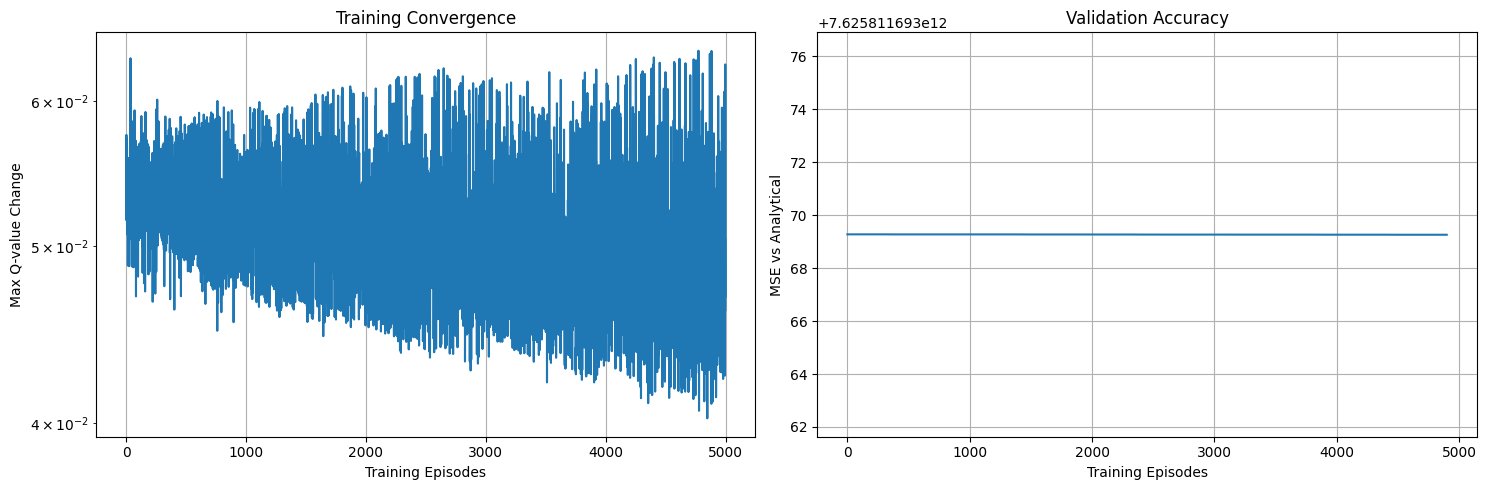

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class CARAUtilityTDLearner:
    """
    Implements TD learning with proper convergence checking based on Q-value stability
    and analytical solution comparison for validation.
    """
    
    def __init__(self, a_return=0.2, b_return=-0.1, p=0.6, r=0.05, T=10.0,
                 num_wealth_bins=50, num_actions=50):
        # Problem parameters
        self.a_util = a_return
        self.a_return = a_return
        self.b_return = b_return
        self.p = p
        self.r = r
        self.T = T
        
        # Discretization parameters
        self.num_wealth_bins = num_wealth_bins
        self.num_actions = num_actions
        
        # Discretized spaces
        self.wealth_bins = np.linspace(0.1, int((1.0+a_return)**T), num_wealth_bins)
        self.actions = np.linspace(0, int((1.0+a_return)**T), num_actions)
        
        # Initialize Q-tables
        self.Q_tables = [np.zeros((num_wealth_bins, num_actions)) for _ in range(T)]
        self.prev_Q_tables = [np.zeros_like(q) for q in self.Q_tables]
        
        # Convergence tracking
        self.delta_history = []
        self.analytical_mse = []
        
    def _discretize_wealth(self, W):
        return np.argmin(np.abs(self.wealth_bins - W))

    def _epsilon_greedy(self, t, w_idx, epsilon=0.1):
        if np.random.rand() < epsilon:
            return np.random.choice(self.actions)
        return self.actions[np.argmax(self.Q_tables[t][w_idx, :])]

    def train(self, max_episodes=10000, learning_rate=0.01, 
             conv_threshold=1e-5, W0=1.0, check_analytical_every=100):
        """
        Train with convergence based on Q-value stability and optional analytical checks
        """
        for episode in range(max_episodes):
            # Store copy of current Q-table for comparison
            self.prev_Q_tables = [np.copy(q) for q in self.Q_tables]

            # Run one episode
            W = W0
            for t in range(self.T):
                w_idx = self._discretize_wealth(W)
                x = self._epsilon_greedy(t, w_idx)
                
                # Transition to next state
                Y = self.a_return if np.random.rand() < self.p else self.b_return
                W_next = x*(Y - self.r) + W*(1 + self.r)
                
                # Calculate TD target
                if t == self.T-1:
                    target = -(np.exp(-self.a_util*W_next))/self.a_util
                else:
                    next_w_idx = self._discretize_wealth(W_next)
                    target = np.max(self.Q_tables[t+1][next_w_idx, :])
                

                
                # Update Q-table
                x_idx = np.argmin(np.abs(self.actions - x))
                # print(f"self.Q_tables[t][w_idx, x_idx]: {self.Q_tables[t][w_idx, x_idx]}")
                self.Q_tables[t][w_idx, x_idx] += learning_rate * \
                    (target - self.Q_tables[t][w_idx, x_idx])
                
                W = W_next

            # Calculate maximum Q-value difference across all tables
            delta = max(
                np.max(np.abs(q - q_prev))
                for q, q_prev in zip(self.Q_tables, self.prev_Q_tables)
            )

            self.delta_history.append(delta)
            
            # Optional analytical solution check
            if episode % check_analytical_every == 0:
                self.analytical_mse.append(self._calculate_analytical_mse())
            
            # Check convergence
            if delta < conv_threshold:
                print(f"Converged at episode {episode} with delta {delta:.2e}")
                print(self.Q_tables)
                break

            if episode == max_episodes-1:
                print(self.Q_tables)

    def _calculate_analytical_mse(self):
        """Calculate MSE against analytical solution for validation"""
        analytical_Q = self._compute_analytical_q()
        return np.mean([
            np.mean((q - aq)**2)
            for q, aq in zip(self.Q_tables, analytical_Q)
        ])
    
    def _compute_analytical_q(self):
        """Calculate analytical Q-values for validation"""
        Q_analytical = []
        for t in range(self.T):
            K = self._compute_K(t)
            Q_t = np.zeros_like(self.Q_tables[t])
            
            for w_idx, W in enumerate(self.wealth_bins):
                for x_idx, x in enumerate(self.actions):
                    exponent = -self.a_util * (1+self.r)**(self.T-t) * W
                    term1 = np.exp(-self.a_util*(1+self.r)**(self.T-t-1)*x*(self.a_return-self.r))
                    term2 = np.exp(-self.a_util*(1+self.r)**(self.T-t-1)*x*(self.b_return-self.r))
                    Q_val = -((K/self.a_util)**(self.T-t-1)) * np.exp(exponent) * \
                            (self.p*term1 + (1-self.p)*term2)
                    Q_t[w_idx, x_idx] = Q_val
            Q_analytical.append(Q_t)
        return Q_analytical

    def _compute_K(self, t):
        """Helper function for analytical solution"""
        numerator = (self.a_return - self.r) * self.p
        denominator = (self.r - self.b_return) * (1 - self.p)
        ln_term = np.log(numerator / denominator)
        
        term1 = -((self.a_return - self.r)/(self.a_return - self.b_return)) * ln_term
        term2 = -((self.b_return - self.r)/(self.a_return - self.b_return)) * ln_term
        
        return self.p*np.exp(term1) + (1-self.p)*np.exp(term2)


    def plot_results(self):
        """Visualize training progress and validation"""
        plt.figure(figsize=(15, 5))
        
        # Convergence plot
        plt.subplot(1, 2, 1)
        plt.semilogy(self.delta_history)
        plt.xlabel('Training Episodes')
        plt.ylabel('Max Q-value Change')
        plt.title('Training Convergence')
        plt.grid(True)
        
        # Analytical comparison plot
        plt.subplot(1, 2, 2)
        plt.plot(range(0, len(self.analytical_mse)*100, 100), self.analytical_mse)
        plt.xlabel('Training Episodes')
        plt.ylabel('MSE vs Analytical')
        plt.title('Validation Accuracy')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

# Usage example
if __name__ == "__main__":
    solver = CARAUtilityTDLearner(
        a_return=0.15,
        b_return=-0.05,
        p=0.6,
        r=0.03,
        T=10
    )
    solver.train(
        max_episodes =5000,
        conv_threshold=1e-5,
        check_analytical_every=100
    )
    solver.plot_results()

 90%|████████▉ | 4480/5000 [00:06<00:00, 691.35it/s]



Converged at episode 4480 with sustained delta < 1e-05


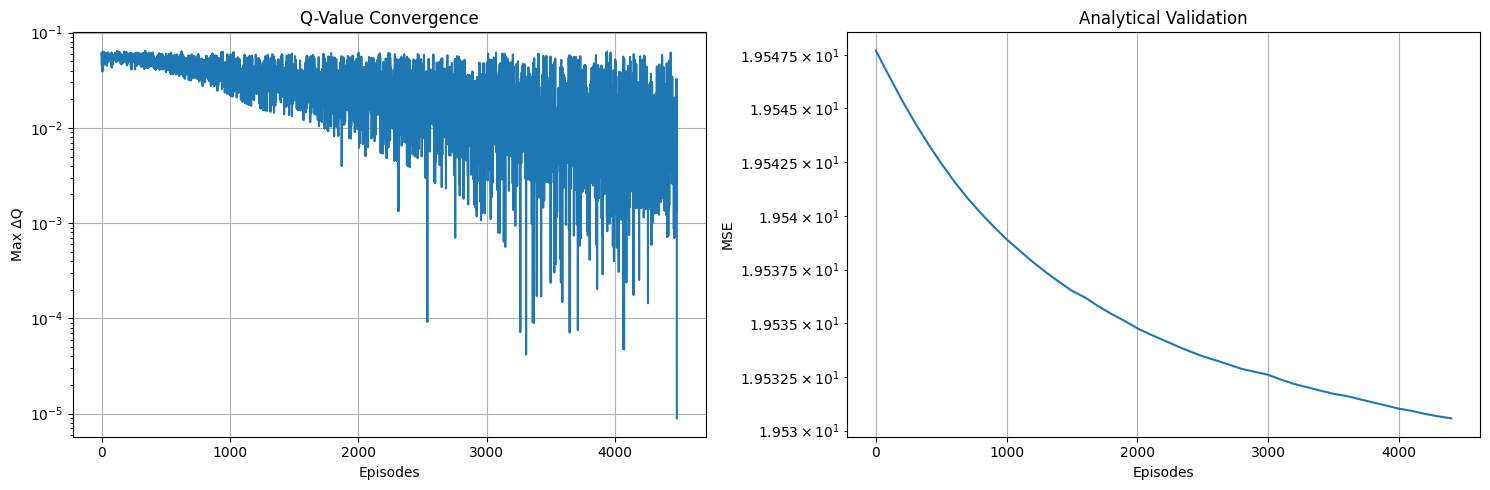

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class AssetAllocationEnvironment:
    """Environment supporting unlimited shorting and leverage"""
    
    def __init__(self, initial_wealth=1.0, T=10, r=0.01, a=1.2, b=0.8, p=0.5, risk_aversion=1.0):
        self.initial_wealth = initial_wealth
        self.T = T
        self.r = r
        self.a = a
        self.b = b
        self.p = p
        self.risk_aversion = a
        
        self.wealth = initial_wealth
        self.time_step = 0
        
    def reset(self):
        self.wealth = self.initial_wealth
        self.time_step = 0
        return (self.time_step, self.wealth)
    
    def step(self, action):
        # Allow any action value (unconstrained shorting and leverage)
        next_wealth = (self.wealth - action) * (1 + self.r) + action * (
            1 + (self.a if np.random.random() < self.p else self.b))
        
        self.wealth = next_wealth
        self.time_step += 1
        
        reward = -np.exp(-self.risk_aversion * next_wealth)/self.risk_aversion if self.time_step == self.T else 0
        return (self.time_step, self.wealth), reward, (self.time_step >= self.T)

class QLearningAgent:
    """Enhanced agent with improved convergence detection and shorting support"""
    
    def __init__(self, env, learning_rate=0.1, discount_factor=1.0, epsilon=0.1, epsilon_decay=0.999,
                 min_epsilon=0.01, wealth_discretization=20, action_discretization=20,
                 action_multiplier_range=(-1.0, 2.0)):
        
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.action_multiplier_range = action_multiplier_range

        # Discretization setup
        self.wealth_discretization = wealth_discretization
        self.action_discretization = action_discretization
        self.q_table = np.zeros((env.T + 1, wealth_discretization, action_discretization))
        self.max_wealth = env.initial_wealth * 2  # Dynamic wealth scaling

        # Convergence monitoring
        self.delta_history = []
        self.convergence_window = []
        self.analytical_mse = []

        self.a = env.a
        self.b = env.b
        self.p = env.p
        self.r = env.r
        self.T = env.T
        self.risk_aversion = env.a

    def discretize_wealth(self, wealth):
        scaled = min(1.0, abs(wealth) / self.max_wealth)
        return np.clip(int(scaled * self.wealth_discretization), 0, self.wealth_discretization-1)

    def discretize_action(self, action, wealth):
        if wealth == 0:
            return 0
        multiplier = action / wealth
        multiplier = np.clip(multiplier, *self.action_multiplier_range)
        normalized = (multiplier - self.action_multiplier_range[0]) / (
            self.action_multiplier_range[1] - self.action_multiplier_range[0])
        return int(normalized * self.action_discretization)

    def action_from_index(self, action_idx, wealth):
        multiplier = self.action_multiplier_range[0] + (
            (self.action_multiplier_range[1] - self.action_multiplier_range[0]) * 
            (action_idx / self.action_discretization))
        return multiplier * wealth

    def get_action(self, state):
        t, wealth = state
        wealth_idx = self.discretize_wealth(wealth)
        
        if np.random.rand() < self.epsilon:
            return self.action_from_index(np.random.randint(self.action_discretization), wealth)
        return self.action_from_index(np.argmax(self.q_table[t, wealth_idx]), wealth)

    def update(self, state, action, reward, next_state, done):
        t, wealth = state
        next_t, next_wealth = next_state
        
        wealth_idx = self.discretize_wealth(wealth)
        action_idx = self.discretize_action(action, wealth)
        next_wealth_idx = self.discretize_wealth(next_wealth)

        # Update Q-table using TD learning
        target = reward + (0 if done else self.discount_factor * 
                          np.max(self.q_table[next_t, next_wealth_idx]))
        self.q_table[t, wealth_idx, action_idx] += self.learning_rate * (
            target - self.q_table[t, wealth_idx, action_idx])

    def train(self, max_episodes=10000, conv_threshold=1e-5, conv_window=5, check_analytical_every=100):
        self.convergence_window = []
        for episode in tqdm(range(max_episodes)):
            prev_q = np.copy(self.q_table)
            
            state = self.env.reset()
            while not self.env.step(state[1])[2]:  # Run episode
                action = self.get_action(state)
                next_state, reward, done = self.env.step(action)
                self.update(state, action, reward, next_state, done)
                state = next_state

            # Improved convergence checking
            delta = np.max(np.abs(self.q_table - prev_q))
            self.delta_history.append(delta)
            self.convergence_window.append(delta)
            if len(self.convergence_window) > conv_window:
                self.convergence_window.pop(0)
                
            # Validate against analytical solution periodically
            if episode % check_analytical_every == 0:
                self.analytical_mse.append(self._calculate_analytical_mse())

            # Check sustained convergence
            if len(self.convergence_window) == conv_window and all(d < conv_threshold for d in self.convergence_window):
                print(f"\nConverged at episode {episode} with sustained delta < {conv_threshold}")
                break


            self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

    def _compute_K(self, t):
        """Computes analytical solution constant K for validation.
        
        Args:
            t (int): Current time step
            
        Returns:
            float: Analytical constant K
        """
        numerator = (self.a - self.r) * self.p
        denominator = (self.r - self.b) * (1 - self.p)
        ln_term = np.log(numerator / denominator)
        
        term1 = -((self.a - self.r)/(self.a - self.b)) * ln_term
        term2 = -((self.b - self.r)/(self.a - self.b)) * ln_term
        
        return self.p * np.exp(term1) + (1 - self.p) * np.exp(term2)

    def _compute_analytical_q(self):
        """Computes analytical Q-values for validation.
        
        Returns:
            np.ndarray: Array of analytical Q-values matching q_table dimensions
        """
        Q_analytical = np.zeros_like(self.q_table)
        for t in range(self.env.T):
            K = self._compute_K(t)
            for w_idx in range(self.wealth_discretization):
                wealth = (w_idx / self.wealth_discretization) * self.max_wealth
                for x_idx in range(self.action_discretization):
                    action = self.action_from_index(x_idx, wealth)
                    exponent = -self.risk_aversion * ((1 + self.r)**(self.T - t)) * wealth
                    term1 = np.exp(-self.risk_aversion * ((1 + self.r)**(self.T - t - 1)) * action * (self.a - self.r))
                    term2 = np.exp(-self.risk_aversion * ((1 + self.r)**(self.T - t - 1)) * action * (self.b - self.r))
                    Q_val = -((K**(self.T - t - 1) / self.risk_aversion)) * np.exp(exponent) * \
                            (self.p * term1 + (1 - self.p) * term2)
                    Q_analytical[t, w_idx, x_idx] = Q_val
        return Q_analytical

    def _calculate_analytical_mse(self):
        """Calculates validation MSE between current Q-values and analytical solution.
        
        Returns:
            float: Mean squared error between learned and analytical Q-values
        """
        analytical_Q = self._compute_analytical_q()
        return np.mean((self.q_table[:self.T] - analytical_Q[:self.T])**2)
    def plot_results(self):
        plt.figure(figsize=(15,5))
        
        plt.subplot(1,2,1)
        plt.semilogy(self.delta_history)
        plt.title('Q-Value Convergence')
        plt.xlabel('Episodes')
        plt.ylabel('Max ΔQ')
        plt.grid(True)
        
        plt.subplot(1,2,2)
        plt.plot(np.arange(len(self.analytical_mse))*100, self.analytical_mse)
        plt.title('Analytical Validation')
        plt.xlabel('Episodes')
        plt.ylabel('MSE')
        plt.yscale('log')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

# Usage Example
if __name__ == "__main__":
    env = AssetAllocationEnvironment(
        initial_wealth=1.0,
        T=10,
        r=0.03,
        a=0.15,
        b=-0.06,
        p=0.6,
        risk_aversion=0.5
    )
    
    agent = QLearningAgent(
        env,
        action_multiplier_range=(-2.0, 3.0),  # Allow shorting up to 200% and leverage up to 300%
        wealth_discretization=100,
        action_discretization=50,
        learning_rate=0.01,
        epsilon_decay=0.995
    )
    
    agent.train(
        max_episodes=5000,
        conv_threshold=1e-5,
        conv_window=1  # Require 5 consecutive episodes below threshold
    )
    
    agent.plot_results()